## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
EV_data=pd.read_csv(r"C:\Users\shell\Downloads\Data Analysis\Python Project\Electric Vehicle\EV-data\Electric_Vehicle_Population_Data.csv")

In [6]:
EV_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [7]:
EV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

#### Counting null values in each column

In [5]:
EV_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [8]:
EV_data=EV_data.dropna() # dropping null values

In [9]:
sns.set_style('whitegrid') # setting style for plots

In [10]:
EV_adoption_by_year=EV_data['Model Year'].value_counts().sort_index()

In [11]:
EV_adoption_by_year

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

C:\Users\shell\AppData\Local\Temp\ipykernel_10452\4001382261.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=EV_adoption_by_year.index, y=EV_adoption_by_year.values, palette='viridis')


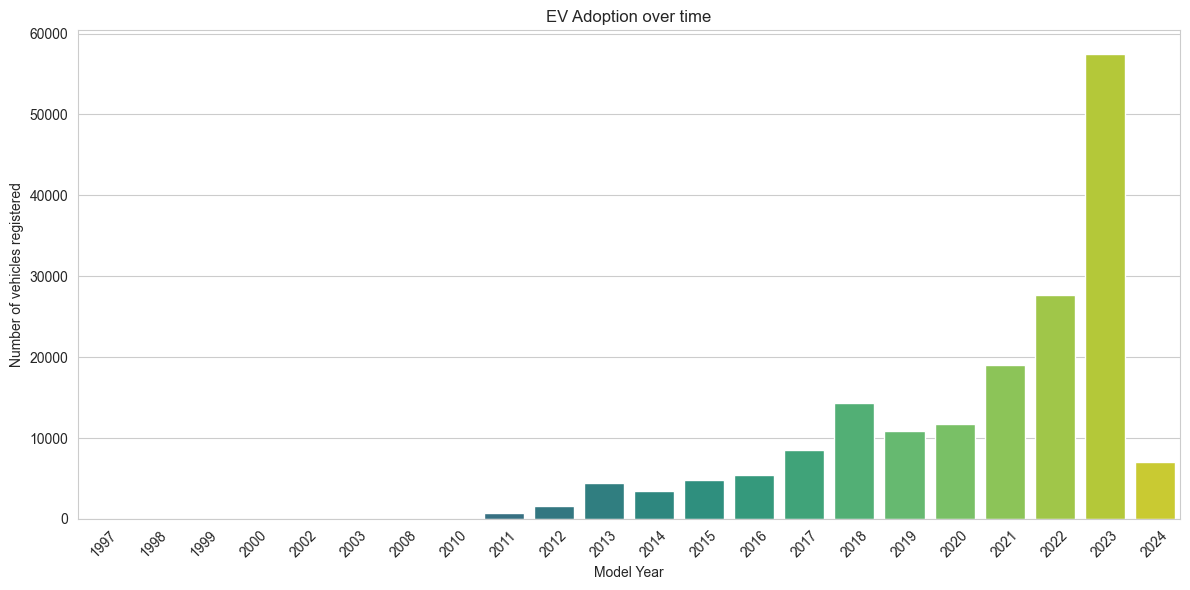

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(x=EV_adoption_by_year.index, y=EV_adoption_by_year.values, palette='viridis')
plt.title('EV Adoption over time')
plt.xlabel('Model Year')
plt.ylabel('Number of vehicles registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the above bar chart, it’s clear that EV adoption has been increasing over time, especially noting a significant upward trend starting around 2016. Till 2016 there is moderate growth in number of electric vehicles and afterwards there is more rapid growth in the numbers from 2017. The year 2023 shows a particularly sharp increase in the number of EVs, with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption.

#### selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties:

In [12]:
# counting no of electrice vehicles in each country
EV_county_distribution = EV_data['County'].value_counts()
EV_county_distribution

County
King            92740
Snohomish       21001
Pierce          13782
Clark           10409
Thurston         6428
Kitsap           5840
Spokane          4586
Whatcom          4253
Benton           2147
Skagit           1910
Island           1882
Clallam          1058
Chelan           1047
Yakima            995
Jefferson         974
San Juan          942
Cowlitz           897
Mason             823
Lewis             739
Grays Harbor      625
Kittitas          623
Franklin          585
Grant             561
Walla Walla       437
Douglas           364
Whitman           334
Klickitat         284
Okanogan          263
Stevens           219
Pacific           198
Skamania          192
Asotin             73
Wahkiakum          60
Pend Oreille       55
Lincoln            49
Adams              48
Ferry              31
Columbia           16
Garfield            3
Name: count, dtype: int64

In [13]:
# extracting top 3 countries
top_counties = EV_county_distribution.head(3).index
top_counties 

Index(['King', 'Snohomish', 'Pierce'], dtype='object', name='County')

In [14]:
EV_data['County'].isin(top_counties)

0          True
1          True
2          True
3          True
4         False
          ...  
177861     True
177862    False
177863    False
177864     True
177865     True
Name: County, Length: 177473, dtype: bool

In [15]:
# data for only the top 3 counties
top_counties_data = EV_data[EV_data['County'].isin(top_counties)]
top_counties_data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
7,KNAGV4LD9J,Snohomish,Bothell,WA,98012.0,2018,KIA,OPTIMA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29,0,1.0,290605598,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177858,5YJ3E1EB8N,Snohomish,Snohomish,WA,98296.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,213520422,POINT (-122.15134 47.8851158),PUGET SOUND ENERGY INC,5.306105e+10
177859,1N4BZ1DV7M,King,Redmond,WA,98053.0,2021,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,172798951,POINT (-122.0222799 47.6958998),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


creating data frame for the above three countries and then arranging them in descending order of number of vehicles

In [16]:
EV_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')
EV_city_distribution_top_counties 

,County,City,Number of Vehicles
0,King,Seattle,29447
1,King,Bellevue,8930
2,King,Redmond,6478
3,King,Kirkland,5362
4,King,Sammamish,5280
...,...,...,...
108,Pierce,Kapowsin,1
109,Pierce,Prairie Ridge,1
110,Snohomish,Alderwood Manor,1
111,Snohomish,Startup,1


In [18]:
# extracting data for top 10 cities only
top_cities = EV_city_distribution_top_counties.head(10)
top_cities

,County,City,Number of Vehicles
0,King,Seattle,29447
1,King,Bellevue,8930
2,King,Redmond,6478
3,King,Kirkland,5362
4,King,Sammamish,5280
5,King,Renton,4980
6,Snohomish,Bothell,4663
7,Pierce,Tacoma,3722
8,King,Tukwila,2927
9,King,Kent,2782


In [19]:
# visualizing above data

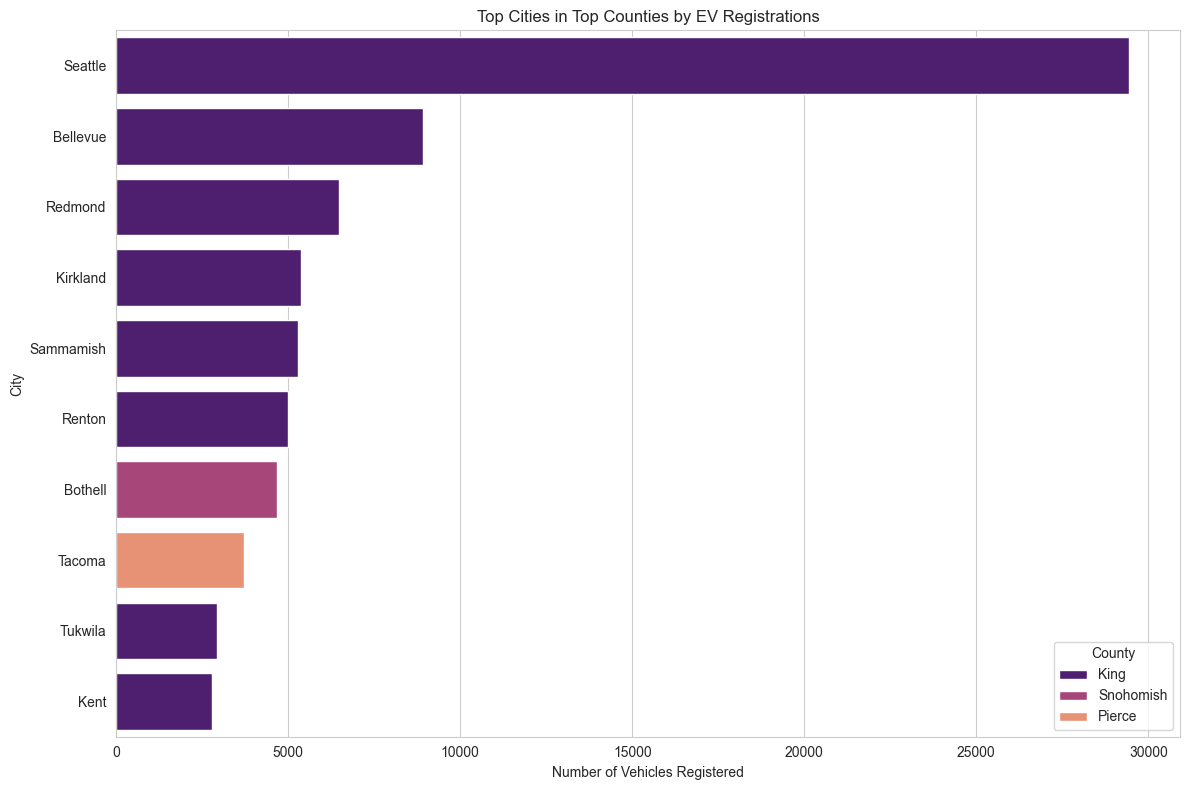

In [20]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

### Categorization in BEV & PHEV

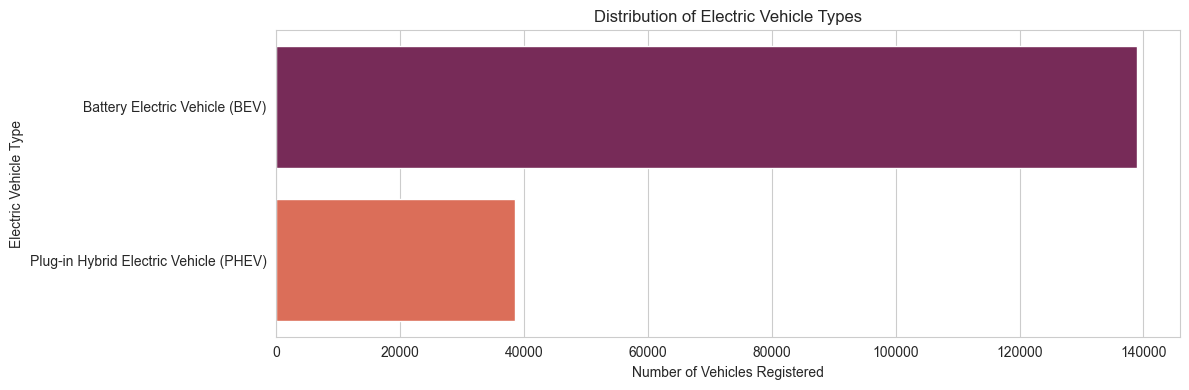

In [23]:
# analyzing the distribution of electric vehicle Types
EV_type_distribution = EV_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(12, 4))
sns.barplot(x=EV_type_distribution.values, y=EV_type_distribution.index, palette="rocket",hue=EV_type_distribution.index,legend=False)
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

### Top 10 Popular EV Makers

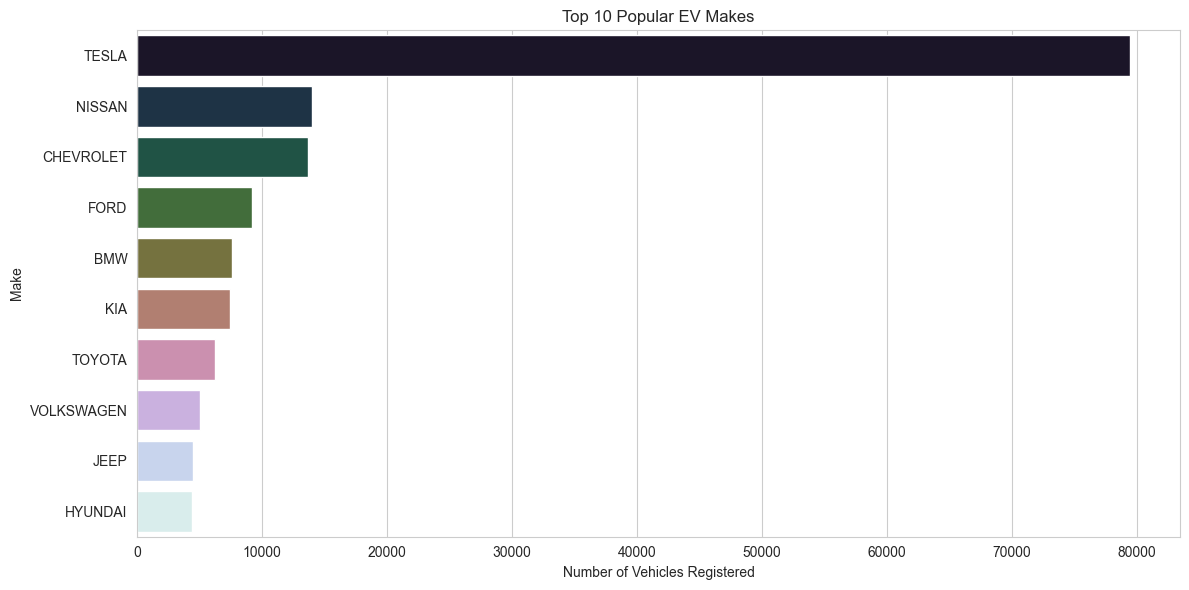

In [24]:
EV_make_distribution = EV_data['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

plt.figure(figsize=(12, 6))
sns.barplot(x=EV_make_distribution.values, y=EV_make_distribution.index, palette="cubehelix",hue=EV_make_distribution.index,legend=False)
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

### Identifying Top models by Top 3 EV Makers

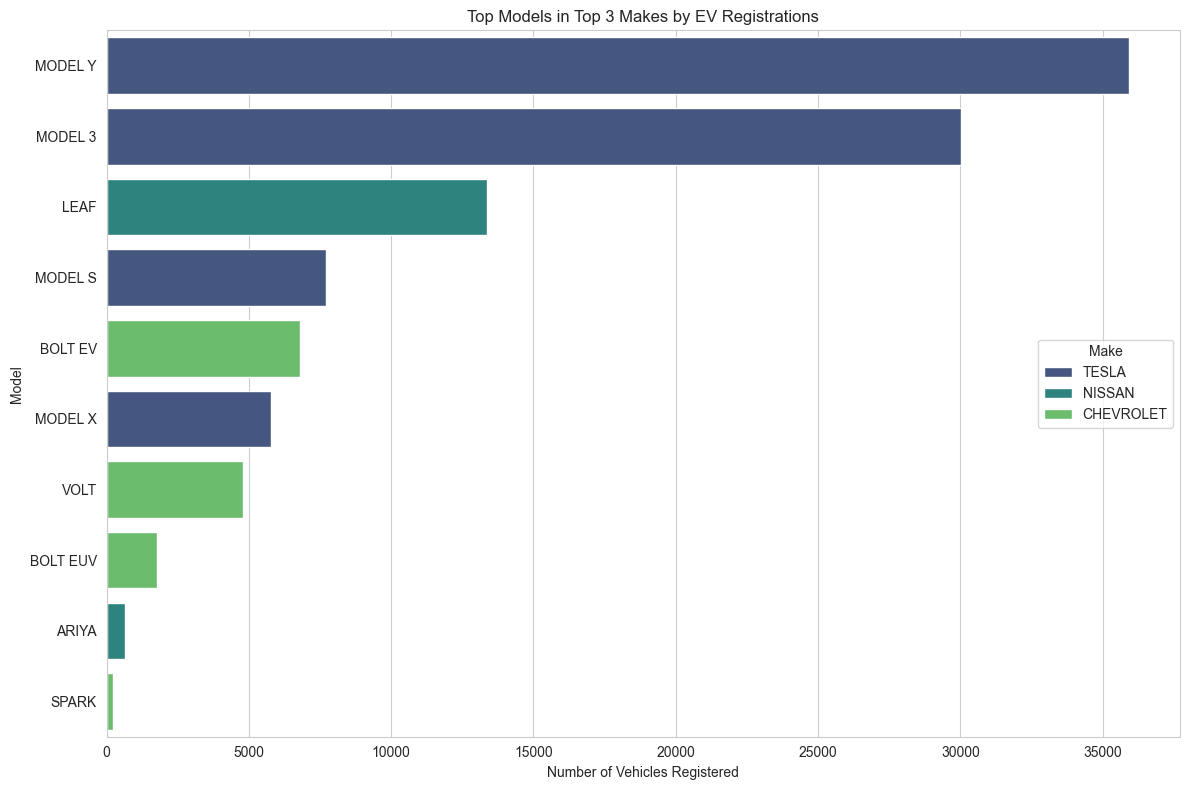

In [25]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = EV_make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_makes_data = EV_data[EV_data['Make'].isin(top_3_makes)]

# analyzing the popularity of EV models within these top manufacturers
EV_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = EV_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

### Analyzing Electrics Vehicle Range and comparing with mean

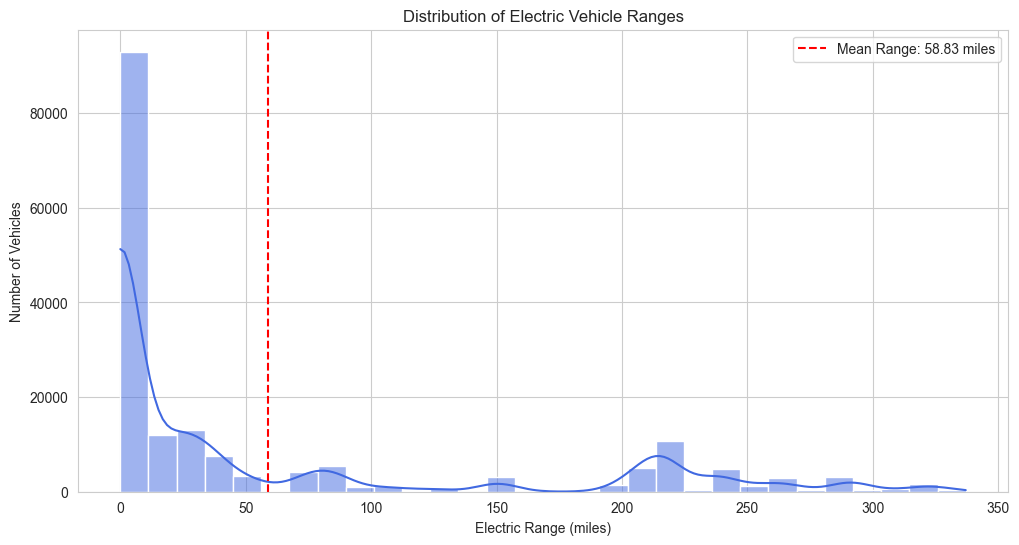

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(EV_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(EV_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {EV_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

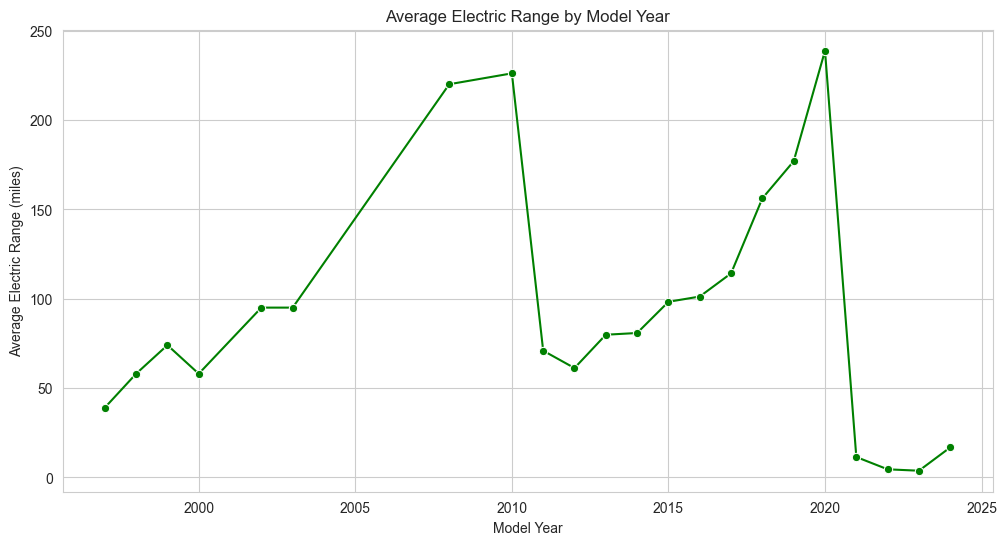

In [26]:
average_range_by_year = EV_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

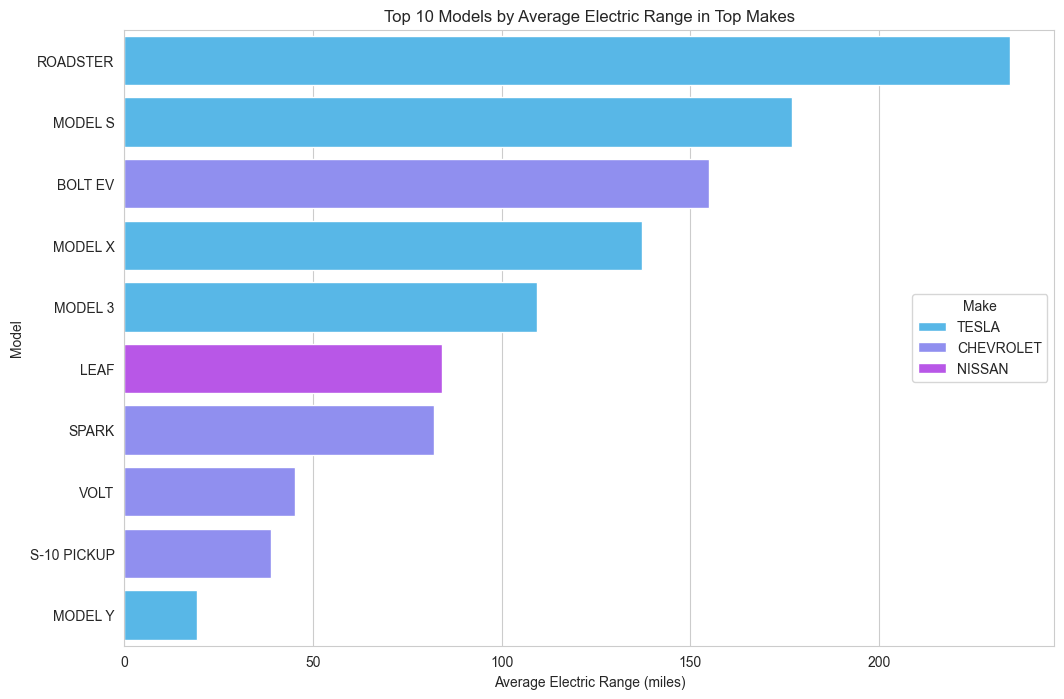

In [27]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

In [28]:
# calculate the number of EVs registered each year
EV_registration_counts = EV_data['Model Year'].value_counts().sort_index()
EV_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

In [29]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = EV_registration_counts[EV_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{np.int64(2024): np.float64(79079.20808938889), np.int64(2025): np.float64(119653.96274428742), np.int64(2026): np.float64(181047.22020265696), np.int64(2027): np.float64(273940.74706208805), np.int64(2028): np.float64(414497.01805382164), np.int64(2029): np.float64(627171.3128407666)}


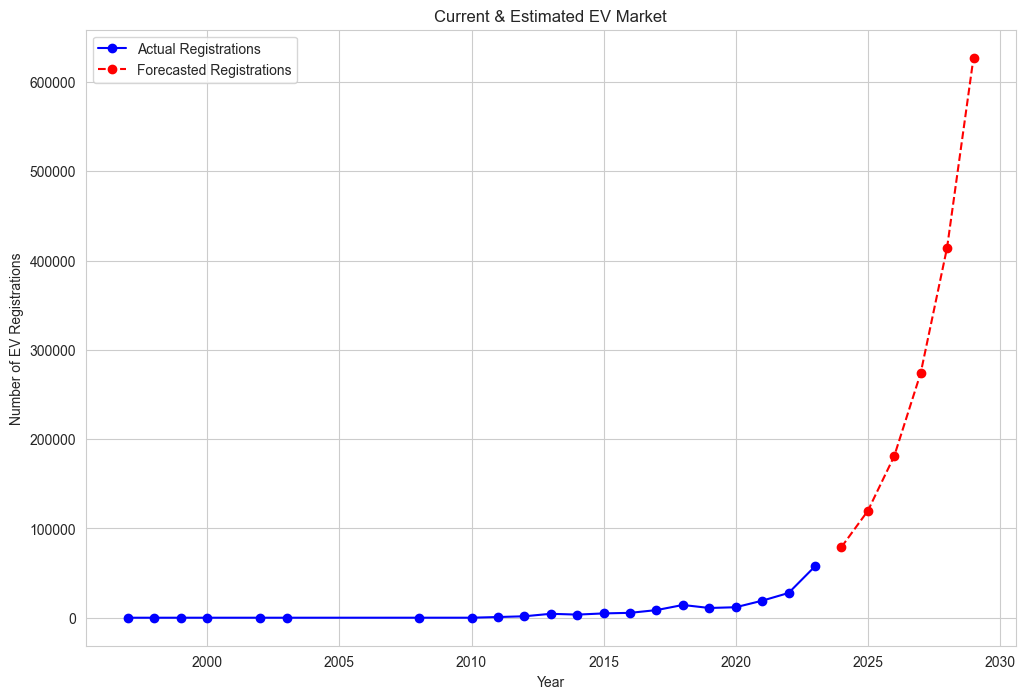

In [30]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

Outcome-from the above graph it is clear that in coming future there is a lot of potential in EV market